# Using Benford's Law to analyze US Covid Data Quality

Benford's law is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. It is seen that a leading `1` occurs about 30% of time and a leading `2` occurs about 17% of time time.

Like many real world data sets, we expect the reported covid data, for number of daily deaths and number of new positive cases to match the expected Benford distribution. 

Benford's law has been used to detect fraud and data quality in many areas including Accounting, Election data and price manipulation.

# Getting the data

The fine folks at https://covidtracking.com/ have been publishing daily statewise data. We copy their data from 24th October and put it in a place we can get in a dataframe.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data

DATA_URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTz5kbmayTWWGzhSTUtKlgQddAozpJqbBQeYnsiZjRkZo0m2cCINqDAH0yQNm4NwBZCFdb1bHTqSzw8/pub?output=csv"
df = pd.read_csv(DATA_URL).fillna(0)
BENFORD_DISTRIBUTION = [
    (1, 0.30103),
    (2, 0.176091),
    (3, 0.124939),
    (4, 0.09691),
    (5, 0.0791812),
    (6, 0.0669468),
    (7, 0.0579919),
    (8, 0.0511525),
    (9, 0.0457575)
]

In [ ]:
def get_data_for_states(states, column_name):
    first_digit_data = {}
    for STATE in states:
        # Filter for specific states
        state_df = df[df["state"].isin([STATE])]

        # Get first digits of deathIncrease 
        first_digit_death = [str(int(el))[0] for el in list(state_df[column_name]) if int(el)]

        # Count the first digits
        from collections import Counter 
        digit_count = Counter(first_digit_death)
        size = len(first_digit_death)


        digit_count_ratio = [(int(first_digit), first_digit_count/size) for first_digit, first_digit_count in digit_count.items()]
        digit_count_ratio.sort()
        first_digit_data[STATE] = digit_count_ratio
    return first_digit_data

# Get the daily deatch increase for some of the largest US states by population
STATES_DATA_FOR_DEATHS = get_data_for_states(["FL", "TX", "CA", "NY", "IL", "OH", "GA", "NC"], "deathIncrease")

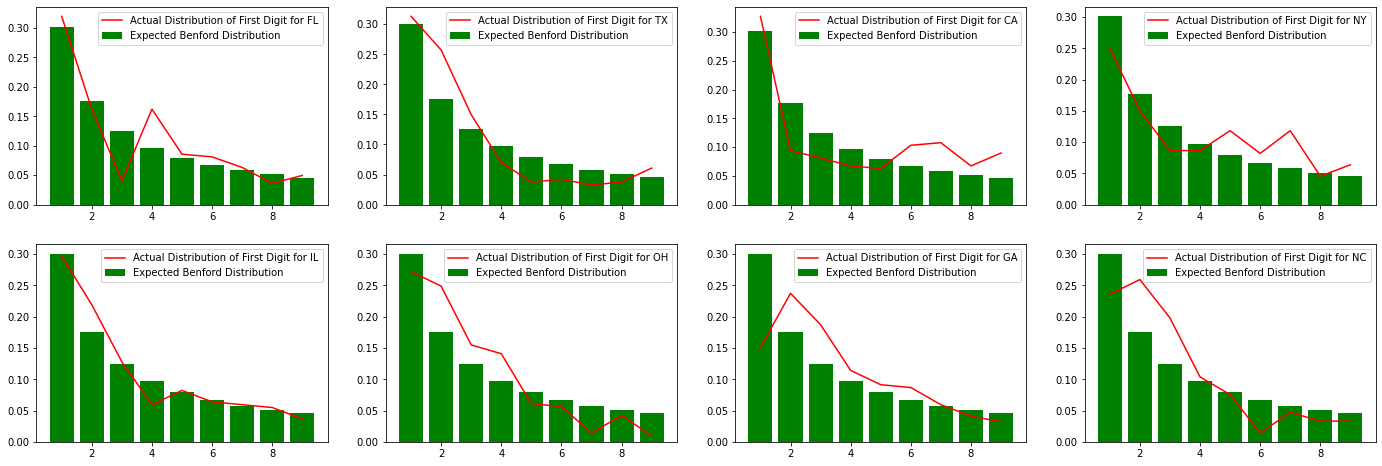

In [ ]:
# Plot the Expected distribution as a bar chart, and actual a line  chart overlay
# Plot this in two rows.
def plot_data(STATES_DATA):
    figs = plt.subplots(2, len(STATES_DATA)//2)
    fig = figs[0]
    axes = figs[1:][0].flatten()
    fig.set_size_inches(24, 8)

    for i, state_data in enumerate(STATES_DATA.items()):
        STATE, data = state_data
        # CA_DATA = STATES_DATA[STATE]
        x, y = zip(*data)
        _, benford_y = zip(*BENFORD_DISTRIBUTION)
        axes[i].bar(x, benford_y, label="Expected Benford Distribution", color="g")
        axes[i].plot(x, y, label=f"Actual Distribution of First Digit for {STATE}", color="r")
        axes[i].legend()

plot_data(STATES_DATA_FOR_DEATHS)

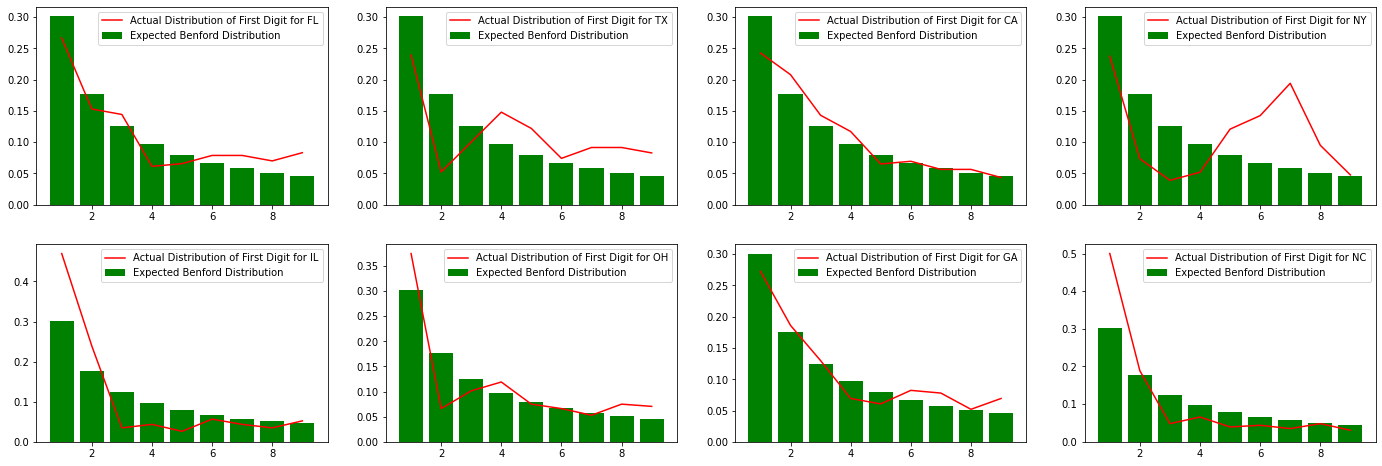

In [ ]:

STATES_DATA_FOR_POSTIVE_TESTS = get_data_for_states(["FL", "TX", "CA", "NY", "IL", "OH", "GA", "NC"], "positiveIncrease")
plot_data(STATES_DATA_FOR_POSTIVE_TESTS)

# References

1. https://mathworld.wolfram.com/BenfordsLaw.html
2. https://covidtracking.com/data
3. https://www.journalofaccountancy.com/issues/2017/apr/excel-and-benfords-law-to-detect-fraud.html